In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='/home/gmayank43/cs230/datasets/'

### Adding some helper functions

In [3]:
def getCocoFromAnnotations(annFile):
        coco=COCO(annFile)
        return coco

def showImage(imgId):
    # load and display image
    # I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
    # use url to load image
    # print(img)
    I = io.imread(img['coco_url'])
    plt.axis('off')
    plt.imshow(I)
    plt.show()

### Outdoor Dataset Generator can be used to get Outdoor Image Ids

In [18]:
class OutdoorDatasetGenerator:
    def __init__(self, coco):
        self.coco = coco
    
    def getCocoCategories(self):
        cats = self.coco.loadCats(self.coco.getCatIds())
        nms=[cat['name'] for cat in cats]
        print(f'There are {len(cats)} coco categories')
        return cats

    def getSuperCategories(self):
        cats = self.getCocoCategories()
        supercats = set([cat['supercategory'] for cat in cats])
        print(f'There are {len(supercats)} coco supercategories')
        # print('COCO supercategories: \n{}'.format(' '.join(nms)))
        return supercats

    def getOutdoorCategories(self):
        cats = self.getCocoCategories()
        outdoorCats = []
        for category in cats:
            if category['supercategory'] == 'outdoor' or category['supercategory'] == 'vehicle':
                outdoorCats.append(category['name'])
        print('Outdoor Categories are', outdoorCats)
        return outdoorCats

    def getOutdoorImageIds(self):
        outdoorCats = self.getOutdoorCategories()
        outdoorImageIds = []
        for cat in outdoorCats:
            catId = self.coco.getCatIds(catNms=[cat])[0];
            images = self.coco.getImgIds(catIds=catId)
            outdoorImageIds.extend(images)
        print(f'Total outdoor images are {len(outdoorImageIds)}')
        return list(set(outdoorImageIds))
    
    def getImage(self, imgId):
        return self.coco.loadImgs(imgId)[0]

Captions Viewer can be used to get the captions given an image

In [14]:
class CaptionsViewer:
    def __init__(self, coco):
        self.coco = coco
        
    def showCaptions(self, img):
        annIds = self.coco.getAnnIds(imgIds=img['id']);
        anns = self.coco.loadAnns(annIds)
        self.coco.showAnns(anns)
        showImage(img)

In [15]:
dataType='train2014'

print('Initialising COCO object for Instances data')
instanceFile='{}/annotations/instances_{}.json'.format(dataDir, dataType)
instanceDataCoco = getCocoFromAnnotations(instanceFile)

print('Initialising COCO object for Captions data')
captionsFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
captionsDataCoco= getCocoFromAnnotations(captionsFile)

Initialising COCO object for Instances data
loading annotations into memory...
Done (t=10.26s)
creating index...
index created!
Initialising COCO object for Captions data
loading annotations into memory...
Done (t=0.57s)
creating index...
index created!


There are 80 coco categories
Outdoor Categories are ['bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench']
Total outdoor images are 36889
A purple double decker bus driving past a van near a building.
a double-decker bus covered in children's illustrations driving next to a van
A double deck bus with the words "WELCOME TO EARLY YEARS PLAYBUS" on the front.
A double deck play bus parked in a lot.
The city bus is parked outside in the parking lot.


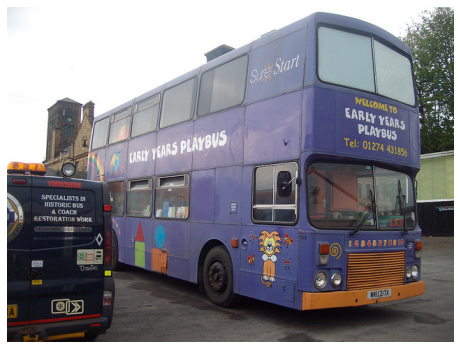

In [16]:
instanceDataGenerator = OutdoorDatasetGenerator(instanceDataCoco)
outdoorImageIds = instanceDataGenerator.getOutdoorImageIds()
imageId = outdoorImageIds[np.random.randint(0,len(outdoorImageIds))]
img = instanceDataGenerator.getImage(imageId)

captionsViewer = CaptionsViewer(captionsDataCoco)
captionsViewer.showCaptions(img)